In [46]:
from mnist import MNIST
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [19]:
mntrain = MNIST('../samples')

In [21]:
img_tr,lbl_tr = mntrain.load_training()
img_ts,lbl_ts = mntrain.load_testing()
img_size = 28 # 28x28 pixels

In [26]:
index = random.randrange(0,len(images))
print("Label: ",labels[index])
print(mntrain.display(images[index]))

Label:  9

............................
............................
............................
............................
............................
............................
............................
...........@@@@@@...........
..........@@@@@@@@..........
.........@@@@...@@@.........
........@@@@.....@@@........
........@@@......@@@........
.......@@@......@@@@........
.......@@.......@@@@........
......@@@.....@@@@@@........
.......@@@...@@@@@@.........
........@@@@@@@@@@@.........
..........@@@...@@@.........
................@@..........
................@@..........
................@@..........
................@@..........
...............@@@..........
...............@@@@.........
...............@@@@.........
................@@..........
............................
............................
28.0


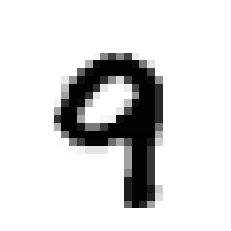

In [45]:
image = np.array(img_tr[index]).reshape(img_size,img_size)
plt.imshow(image, cmap=plt.cm.binary)
plt.gcf().axes[0].set_axis_off()

In [70]:
np.zeros((10,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [109]:

class Layer:
    def __init__(self, depth, length,values=None):
        self.depth = depth
        self.length = length
        self.nodes = np.array([values for i in range(length)]) if values else np.zeros(length)
    def __str__(self):
        return "Layer: depth: %d, length: %d, nodes: %s" % (self.depth, self.length, self.nodes)
    def __repr__(self):
        return self.__str__()
    def __getitem__(self, index):
        return self.nodes[index]
    def __setitem__(self, index, value):
        self.nodes[index].value = value
    def __iter__(self):
        return iter(self.nodes)
    def __len__(self):
        return len(self.nodes)
    def __contains__(self, item):
        return item in self.nodes
    def __delitem__(self, index):
        del self.nodes[index]
    
    def get_values(self):
        return self.nodes
    def set_values(self, values):
        self.nodes = np.array(values)
    values = property(get_values, set_values)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def __str__(self):
        return "Neuron: weights: %s, bias: %s" % (self.weights, self.bias)
    def __repr__(self):
        return self.__str__()
    
class Layer_Connection:
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2
        self.neuron_weights = np.random.rand(len(layer2), len(layer1))
        self.neuron_biases = np.random.rand(len(layer2))

            
    def __str__(self):
        return "Layer_Connection: layer1: %s, layer2: %s, weights: %s, biases: %s" % (self.layer1, self.layer2, self.neuron_weights, self.neuron_biases)
    def __repr__(self):
        return self.__str__()
    def __getitem__(self, index):
        return self.neuron_weights[index]
    def __setitem__(self, index, value):
        self.neuron_weights[index] = value
    def __iter__(self):
        return iter(self.neuron_weights)
    def __len__(self):
        return len(self.neuron_weights)
    def __contains__(self, item):
        return item in self.neuron_weights
    def __delitem__(self, index):
        del self.neuron_weights[index]


class Neural_Network:
    def __init__(self, input_size, output_size,hidden_size, hidden_layers=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.layers = [Layer(0, input_size)]
        self.layers.extend([Layer(i+1, hidden_size) for i in range(hidden_layers)])
        self.layers.append(Layer(hidden_layers+1, output_size))
        self.connections = [Layer_Connection(self.layers[i], self.layers[i+1]) for i in range(len(self.layers)-1)]
    
    def __str__(self):
        return "Neural_Network: input_size: %d, hidden_size: %d, output_size: %d, hidden_layers: %d, layers: %s, connections: %s" % (self.input_size, self.hidden_size, self.output_size, len(self.layers)-2, self.layers, self.connections)
    def __repr__(self):
        return self.__str__()
    
    def input_image(self, image):
        self.layers[0].values = image
    def output_image(self):
        return self.layers[-1].values
    def feed_forward(self):
        for i in self.layers[1:]:
            print(i.depth)
            np.matmul(self.connections[i.depth-1].neuron_weights, self.layers[i.depth-1].values, out=self.layers[i.depth].values)    
            self.layers[i.depth].values += self.connections[i.depth-1].neuron_biases
            self.layers[i.depth].values = 1/(1+np.exp(-self.layers[i.depth].values))
    def back_propagate(self, expected):
        error = expected - self.output_image()
        for i in range(len(self.layers)-1, 0, -1):
            self.connections[i-1].neuron_biases += error
            self.connections[i-1].neuron_weights += np.outer(self.layers[i-1].values, error)
            error = np.matmul(self.connections[i-1].neuron_weights, error)
            

In [110]:
nn = Neural_Network(784, 10, 16, 2)

In [111]:
nn.input_image(img_tr[0])

In [113]:
nn.feed_forward()

1
2
3


In [114]:
nn.output_image()

array([0.99995965, 0.99974451, 0.99960896, 0.99872731, 0.99995571,
       0.99983959, 0.9984753 , 0.99935898, 0.99991505, 0.99989773])

In [ ]:
class Neural_Network():
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        
    def forward(self, X):

In [50]:
x  = np.array([])
x

array([], dtype=float64)